In [1]:
import pandas as pd
import os

# Actual

In [2]:
data_frames_1=[]
data_frames_2=[]
for i in range(0,31):
    df=pd.read_excel(r'E:\Desktop\Datasets\actual_july\15 min Dispatch July 2020.xlsx',sheet_name=i) 

    temp=list(df.columns)

    date = temp[8].date()
    df.columns = df.iloc[0]
    df=df.drop(0)
    df=df.drop(columns=df.columns[-3:],axis=1)
    x=df.iloc[:, 0]

    t=0
    for i in x:
        t=t+1
        if i=='Total MW':

            break
    df=df.iloc[:t-1, :]
    df1 = pd.DataFrame()
    import datetime as dt
    t1 = dt.datetime.strptime('00:00:00', '%H:%M:%S')
    for i in range (1,len(df.columns),2):
        df1[str(t1.time())]=df.iloc[:, i]+df.iloc[:, i+1]
        t2 = dt.datetime.strptime('00:30:00', '%H:%M:%S')
        time_zero = dt.datetime.strptime('00:00:00', '%H:%M:%S')
        x=(t1 - time_zero + t2).time()
        t1 = dt.datetime.strptime(str(x), '%H:%M:%S')
        
    m=df.iloc[:t-1, 0]
    list(m)
    df1.insert(0, 'Power_Plant', m)
    df2=pd.melt(df1,id_vars=['Power_Plant'])
    df1['Date']=date
    df2['Date']=date
    data_frames_1.append(df1)
    data_frames_2.append(df2)


In [3]:
#merge all the dataframes(all days)
from functools import reduce
df_merged_1 = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames_2)
df_merged_1.shape

(54144, 4)

In [4]:
df_merged_1.head()

,Power_Plant,variable,value,Date
0,Canyon,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [5]:
df_merged_1=df_merged_1.rename(columns = {'Power_Plant':'Plant','variable':'Time','value':'Actual_Dispatch'}) #renaming...

In [6]:
df_merged_1.head()

,Plant,Time,Actual_Dispatch,Date
0,Canyon,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [7]:
#set the index column...
df_reset_1=df_merged_1.set_index('Plant')
df_reset_1.head()

,Time,Actual_Dispatch,Date
Plant,,,
Canyon,00:00:00,20.0,2020-07-01
WPS,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,91.0,2020-07-01
Polp,00:00:00,40.0,2020-07-01


In [8]:
#renaming a plant(similar name as forecast dispatch)...
df_new_1 = df_reset_1.rename(index={'Canyon':'Cany'})
df_new_1.head()

,Time,Actual_Dispatch,Date
Plant,,,
Cany,00:00:00,20.0,2020-07-01
WPS,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,91.0,2020-07-01
Polp,00:00:00,40.0,2020-07-01


# Forecast

In [10]:
#get all the files in the forecast folder..........
def fileList(path):
    listOfFiles = os.listdir(path)
    files=[]
    
    for file in listOfFiles:
        fullPath = os.path.join(path, file) #full path for the file
        if os.path.isdir(fullPath): #if there are sub folders.....
            files = files + fileList(fullPath) #recursively loop through the sub folder
        else:
            files.append(fullPath)
                
    return files

all_the_files=fileList(r'E:\Desktop\Datasets\forcast_july')

In [11]:
##############
data_frames1=[]
data_frames2=[]
for file in all_the_files:
    df=pd.read_excel(file)
    df.columns = df.iloc[0] #make columns as 0th row items..
    columns=df.columns
    date=columns[1].date() 
    df=df.drop(0) #drop 0th row items
    df.columns = df.iloc[0] #make columns as 0th row items..
    df=df.drop(1)  #drop 1st row items
    plants_temp=df.iloc[:,0] #all the items in plant column(this includes unnessasary items)
    plants=[]
    #get only the correct plants...
    for plant in plants_temp:
        if plant=='Total Generation':
            break
        else:
            plants.append(plant)
    df = df.loc[:, df.columns.notnull()] #remove nan columns.............
    z=len(plants) #only get the relevant rows...............
    df=df.head(z) #only get the dataframe which contains the needed rows...
    df.insert(0, 'Power_Plant', plants)
    df=df.drop(columns=df.columns[-1:],axis=1) #drop the last column.......
    df1=pd.melt(df,id_vars=['Power_Plant']) #reshape the df using melt function...
    df['Date']=date
    df1['Date']=date
    data_frames1.append(df)
    data_frames2.append(df1)

In [12]:
#merge all the dataframes of all the days...
from functools import reduce
df_merged_2 = reduce(lambda  left,right: pd.merge(left,right,how='outer'), data_frames2)
df_merged_2.shape

(62352, 4)

In [13]:
df_merged_2.head()

,Power_Plant,1,value,Date
0,WPS,00:00:00,0.0,2020-07-01
1,Cany,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [14]:
df_merged_2=df_merged_2.rename(columns = {'Power_Plant':'Plant',1:'Time','value':'Forecast_Distpatch'}) #rename columns...

In [15]:
df_merged_2.head()

,Plant,Time,Forecast_Distpatch,Date
0,WPS,00:00:00,0.0,2020-07-01
1,Cany,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [16]:
#set the index column...
df_reset_2=df_merged_2.set_index('Plant')
df_reset_2.head(50)

,Time,Forecast_Distpatch,Date
Plant,,,
WPS,00:00:00,0.0,2020-07-01
Cany,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,60.636,2020-07-01
Polp,00:00:00,78.479,2020-07-01
UKPS,00:00:00,0.0,2020-07-01
Koth,00:00:00,32.876,2020-07-01
Victoria,00:00:00,0.0,2020-07-01
Rand,00:00:00,0.0,2020-07-01


In [17]:
#renaming a plant...
df_new_2 = df_reset_2.rename(index={'UKPS':'Upper Kothmale','Victoria':'Vict','Sama':'Sam','Uthuru_Janani':'Uthuru Janani','Ace (Embilipitiya)':'ACE EMBP','ACE (Matara)':'ACE Matara','VPOWER_Hamb':'VPOWER Hamb.','VPOWER_Palle':'VPOWER Palle.','VPOWER_Horana':'VPOWER Horana','ALTAAQ_Polon':'ALTAQQA-Pol.','ALTAAQ_Mahiya':'ALTAQQA-Mahi.','Solar':'Solar**','Wind':'Wind**','Mini Hydro***':'CEB/IPP Mini Hydro***'})
df_new_2.head()

,Time,Forecast_Distpatch,Date
Plant,,,
WPS,00:00:00,0.0,2020-07-01
Cany,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,60.636,2020-07-01
Polp,00:00:00,78.479,2020-07-01


#CALCULATE THE DIFFERENCE.....

In [18]:
df_new_1.head()

,Time,Actual_Dispatch,Date
Plant,,,
Cany,00:00:00,20.0,2020-07-01
WPS,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,91.0,2020-07-01
Polp,00:00:00,40.0,2020-07-01


In [19]:
df_new_2.head()

,Time,Forecast_Distpatch,Date
Plant,,,
WPS,00:00:00,0.0,2020-07-01
Cany,00:00:00,0.0,2020-07-01
Olax,00:00:00,10.0,2020-07-01
Nlax,00:00:00,60.636,2020-07-01
Polp,00:00:00,78.479,2020-07-01


In [20]:
#set the index column
df_new_3 = df_new_1.reset_index()
df_new_4 = df_new_2.reset_index()

In [21]:
df_new_3.head()

,Plant,Time,Actual_Dispatch,Date
0,Cany,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [22]:
df_new_4.head()

,Plant,Time,Forecast_Distpatch,Date
0,WPS,00:00:00,0.0,2020-07-01
1,Cany,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [23]:
df_new_3.dtypes

Plant              object
Time               object
Actual_Dispatch    object
Date               object
dtype: object

In [24]:
df_new_3.dtypes

Plant              object
Time               object
Actual_Dispatch    object
Date               object
dtype: object

In [25]:
df_new_3['Plant']=df_new_3['Plant'].astype('string')
df_new_3['Actual_Dispatch'] = df_new_3['Actual_Dispatch'].astype(float)
df_new_3['Time']=df_new_3['Time'].astype('string')
df_new_3['Date']=df_new_3['Date'].astype('string')

In [26]:
df_new_4['Plant']=df_new_4['Plant'].astype('string')
df_new_4['Forecast_Distpatch'] = df_new_4['Forecast_Distpatch'].astype(float)
df_new_4['Time']=df_new_4['Time'].astype('string')
df_new_4['Date']=df_new_4['Date'].astype('string')

In [27]:
df_new_3.dtypes

Plant               string
Time                string
Actual_Dispatch    float64
Date                string
dtype: object

In [28]:
df_new_4.dtypes

Plant                  string
Time                   string
Forecast_Distpatch    float64
Date                   string
dtype: object

In [29]:
df_new_3.head()

,Plant,Time,Actual_Dispatch,Date
0,Cany,00:00:00,20.0,2020-07-01
1,WPS,00:00:00,0.0,2020-07-01
2,Olax,00:00:00,10.0,2020-07-01
3,Nlax,00:00:00,91.0,2020-07-01
4,Polp,00:00:00,40.0,2020-07-01


In [30]:
df_new_4.head()

,Plant,Time,Forecast_Distpatch,Date
0,WPS,00:00:00,0.000,2020-07-01
1,Cany,00:00:00,0.000,2020-07-01
2,Olax,00:00:00,10.000,2020-07-01
3,Nlax,00:00:00,60.636,2020-07-01
4,Polp,00:00:00,78.479,2020-07-01


In [31]:
dfinal = df_new_3.merge(df_new_4, on=['Plant','Date','Time'], how = 'inner')

In [32]:
dfinal.head()

,Plant,Time,Actual_Dispatch,Date,Forecast_Distpatch
0,Nlax,00:00:00,91.0,2020-07-01,60.636
1,Polp,00:00:00,40.0,2020-07-01,78.479
2,Upper Kothmale,00:00:00,0.0,2020-07-01,0.000
3,Koth,00:00:00,96.0,2020-07-01,32.876
4,Vict,00:00:00,0.0,2020-07-01,0.000


In [33]:
#get the difference
for i in range (0,len(dfinal.columns)):
    dfinal['Difference']=dfinal['Actual_Dispatch']-dfinal['Forecast_Distpatch'] #add column names as time.....
dfinal.head()

,Plant,Time,Actual_Dispatch,Date,Forecast_Distpatch,Difference
0,Nlax,00:00:00,91.0,2020-07-01,60.636,30.364
1,Polp,00:00:00,40.0,2020-07-01,78.479,-38.479
2,Upper Kothmale,00:00:00,0.0,2020-07-01,0.000,0.000
3,Koth,00:00:00,96.0,2020-07-01,32.876,63.124
4,Vict,00:00:00,0.0,2020-07-01,0.000,0.000


# Analysis

In [34]:
dfinal=dfinal.reindex(columns=['Plant','Date','Time', 'Actual_Dispatch','Forecast_Distpatch','Difference'])
dfinal.head()

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference
0,Nlax,2020-07-01,00:00:00,91.0,60.636,30.364
1,Polp,2020-07-01,00:00:00,40.0,78.479,-38.479
2,Upper Kothmale,2020-07-01,00:00:00,0.0,0.000,0.000
3,Koth,2020-07-01,00:00:00,96.0,32.876,63.124
4,Vict,2020-07-01,00:00:00,0.0,0.000,0.000


In [35]:
dfinal.shape

(29808, 6)

In [44]:
dfinal.dtypes

Plant                  string
Date                   string
Time                   string
Actual_Dispatch       float64
Forecast_Distpatch    float64
Difference            float64
dtype: object

In [47]:
#maximum difference in when grouping by plants...
d1=dfinal.groupby('Plant').Difference.max()
d1

Plant
ACE EMBP                 184.0000
ACE Matara                48.0000
ALTAQQA-Mahi.             20.0000
ALTAQQA-Pol.              16.0000
Asia Power                78.0000
Barge                    100.5980
Bowa                      79.0000
CEB/IPP Mini Hydro***    202.0000
Koth                     251.0000
Kukule                   156.0000
Nlax                     193.8430
Polp                     170.8961
Rand                     162.0000
Rant                      58.0000
Sam                      200.0000
Sojitz CCP               323.0000
Solar**                   52.0000
Uku                       74.0000
Upper Kothmale           301.0000
Uthuru Janani            122.0000
VPOWER Hamb.              48.0000
VPOWER Palle.             50.0000
Vict                     312.0000
Name: Difference, dtype: float64

In [48]:
#minimum difference in when grouping by plants...
d2=dfinal.groupby('Plant').Difference.min()
d2

Plant
ACE EMBP                 -92.820
ACE Matara               -24.000
ALTAQQA-Mahi.            -10.000
ALTAQQA-Pol.              -8.000
Asia Power               -42.000
Barge                    -63.000
Bowa                     -36.628
CEB/IPP Mini Hydro***    -81.000
Koth                    -115.830
Kukule                   -74.999
Nlax                     -67.790
Polp                     -41.608
Rand                     -94.677
Rant                     -21.000
Sam                     -100.000
Sojitz CCP              -163.000
Solar**                  -18.000
Uku                      -40.000
Upper Kothmale          -150.000
Uthuru Janani            -21.000
VPOWER Hamb.             -24.000
VPOWER Palle.            -24.000
Vict                    -140.090
Name: Difference, dtype: float64

In [50]:
#all the details of max,min,count,median,mean and std according to the plants by Difference value....
d3=dfinal.groupby('Plant').Difference.agg(['max', 'min', 'count', 'median', 'mean','std'])
d3

,max,min,count,median,mean,std
Plant,,,,,,
ACE EMBP,184.0000,-92.820,1281,84.1800,69.704747,52.151356
ACE Matara,48.0000,-24.000,1281,24.0000,13.597179,17.718683
ALTAQQA-Mahi.,20.0000,-10.000,1281,0.0000,1.211449,5.958320
ALTAQQA-Pol.,16.0000,-8.000,1281,0.0000,1.348860,4.782927
Asia Power,78.0000,-42.000,1281,2.0000,13.319335,25.071246
Barge,100.5980,-63.000,1281,60.0000,49.234493,23.654637
Bowa,79.0000,-36.628,1281,0.0000,8.673340,22.808697
CEB/IPP Mini Hydro***,202.0000,-81.000,1281,22.0000,29.108509,56.226147
Koth,251.0000,-115.830,1281,37.0450,37.075132,51.410500


In [58]:
#0 Difference dispatches rows....
filtering1 = dfinal['Difference'] == 0 #filter where the Difference is equal to 0...
d4=dfinal.where(filtering1)
d4.dropna()

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference
2,Upper Kothmale,2020-07-01,00:00:00,0.0,0.0,0.0
4,Vict,2020-07-01,00:00:00,0.0,0.0,0.0
5,Rand,2020-07-01,00:00:00,0.0,0.0,0.0
6,Rant,2020-07-01,00:00:00,0.0,0.0,0.0
8,Bowa,2020-07-01,00:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...
29802,VPOWER Hamb.,2020-07-29,23:30:00,0.0,0.0,0.0
29803,VPOWER Palle.,2020-07-29,23:30:00,0.0,0.0,0.0
29804,ALTAQQA-Pol.,2020-07-29,23:30:00,0.0,0.0,0.0
29805,ALTAQQA-Mahi.,2020-07-29,23:30:00,0.0,0.0,0.0


In [59]:
#greater than 0 Difference dispatches rows....
filtering2 = dfinal['Difference'] > 0 #filter where the Difference is greater 0...
d5=dfinal.where(filtering2)
d5.dropna()

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference
0,Nlax,2020-07-01,00:00:00,91.0,60.6360,30.3640
3,Koth,2020-07-01,00:00:00,96.0,32.8760,63.1240
7,Uku,2020-07-01,00:00:00,72.0,40.0000,32.0000
10,Kukule,2020-07-01,00:00:00,105.0,0.0000,105.0000
12,Barge,2020-07-01,00:00:00,90.0,45.0000,45.0000
...,...,...,...,...,...,...
29785,Nlax,2020-07-29,23:30:00,49.0,0.0000,49.0000
29786,Polp,2020-07-29,23:30:00,96.0,6.8264,89.1736
29789,Vict,2020-07-29,23:30:00,56.0,0.0000,56.0000
29792,Uku,2020-07-29,23:30:00,72.0,0.0000,72.0000


In [60]:
#less than 0 Difference dispatches rows....
filtering3 = dfinal['Difference'] < 0 #filter where the Difference is greater 0...
d6=dfinal.where(filtering3)
d6.dropna()

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference
1,Polp,2020-07-01,00:00:00,40.0,78.4790,-38.4790
11,Uthuru Janani,2020-07-01,00:00:00,0.0,20.0000,-20.0000
13,ACE EMBP,2020-07-01,00:00:00,0.0,51.1086,-51.1086
15,Asia Power,2020-07-01,00:00:00,0.0,32.9000,-32.9000
23,Nlax,2020-07-01,00:30:00,39.0,60.6360,-21.6360
...,...,...,...,...,...,...
29795,Kukule,2020-07-29,23:30:00,0.0,34.4800,-34.4800
29797,Barge,2020-07-29,23:30:00,0.0,60.0000,-60.0000
29798,ACE EMBP,2020-07-29,23:30:00,0.0,46.0992,-46.0992
29799,ACE Matara,2020-07-29,23:30:00,0.0,16.0000,-16.0000


In [62]:
#variance in Actual & Forecast dispatches....
dfinal['Variance%']=dfinal['Difference'].divide(dfinal['Forecast_Distpatch']).multiply(100)

In [63]:
dfinal.head()

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference,Variance%
0,Nlax,2020-07-01,00:00:00,91.0,60.636,30.364,50.075863
1,Polp,2020-07-01,00:00:00,40.0,78.479,-38.479,-49.030951
2,Upper Kothmale,2020-07-01,00:00:00,0.0,0.000,0.000,NaN
3,Koth,2020-07-01,00:00:00,96.0,32.876,63.124,192.006327
4,Vict,2020-07-01,00:00:00,0.0,0.000,0.000,NaN


In [64]:
dfinal.head(20)

,Plant,Date,Time,Actual_Dispatch,Forecast_Distpatch,Difference,Variance%
0,Nlax,2020-07-01,00:00:00,91.0,60.6360,30.3640,50.075863
1,Polp,2020-07-01,00:00:00,40.0,78.4790,-38.4790,-49.030951
2,Upper Kothmale,2020-07-01,00:00:00,0.0,0.0000,0.0000,NaN
3,Koth,2020-07-01,00:00:00,96.0,32.8760,63.1240,192.006327
4,Vict,2020-07-01,00:00:00,0.0,0.0000,0.0000,NaN
5,Rand,2020-07-01,00:00:00,0.0,0.0000,0.0000,NaN
6,Rant,2020-07-01,00:00:00,0.0,0.0000,0.0000,NaN
7,Uku,2020-07-01,00:00:00,72.0,40.0000,32.0000,80.000000
8,Bowa,2020-07-01,00:00:00,0.0,0.0000,0.0000,NaN
9,Sam,2020-07-01,00:00:00,0.0,0.0000,0.0000,NaN


In [67]:
#all the details of max,min,count,median,mean and std according to the dates by Difference value....
d7=dfinal.groupby('Date').Difference.agg(['max', 'min', 'count', 'median', 'mean','std'])
d7

,max,min,count,median,mean,std
Date,,,,,,
2020-07-01,162.000,-163.000,1104,14.0150,24.688919,45.953111
2020-07-03,200.000,-163.000,1104,20.0000,28.199825,51.301676
2020-07-05,282.284,-74.999,759,0.0000,25.059306,46.426851
2020-07-06,275.000,-100.000,1104,20.0000,27.767837,48.159620
2020-07-07,314.000,-150.000,1104,18.0000,32.038118,54.087103
2020-07-08,318.000,-89.500,1104,20.0000,37.561203,61.066733
2020-07-09,318.000,-89.440,1104,16.6670,28.189386,49.254951
2020-07-10,311.000,-150.000,1104,0.0000,24.764693,49.653494
2020-07-11,208.606,-123.680,1104,0.0000,15.547658,32.847425


In [68]:
#all the details of max,min,count,median,mean and std according to the times by Difference value....
d8=dfinal.groupby('Time').Difference.agg(['max', 'min', 'count', 'median', 'mean','std'])
d8

,max,min,count,median,mean,std
Time,,,,,,
00:00:00,136.8400,-98.082,598,0.000,6.816201,29.214952
00:30:00,149.2906,-91.315,598,0.000,6.027979,28.076337
01:00:00,148.2906,-89.565,598,0.000,5.835781,27.265916
01:30:00,174.8430,-88.965,598,0.000,5.941902,27.140354
02:00:00,134.6800,-87.415,598,0.000,5.455724,26.168804
02:30:00,134.6800,-86.615,598,0.000,5.240747,25.139804
03:00:00,136.6800,-85.815,598,0.000,5.390505,25.760500
03:30:00,117.0000,-85.215,598,0.000,6.140113,26.085619
04:00:00,131.0000,-87.015,598,0.000,7.761474,29.518283


# Vizualizations

In [70]:
import matplotlib.pyplot as plt #import the vizualization library

In [81]:
d10=d8.reset_index() #reset the index for get Time as a column

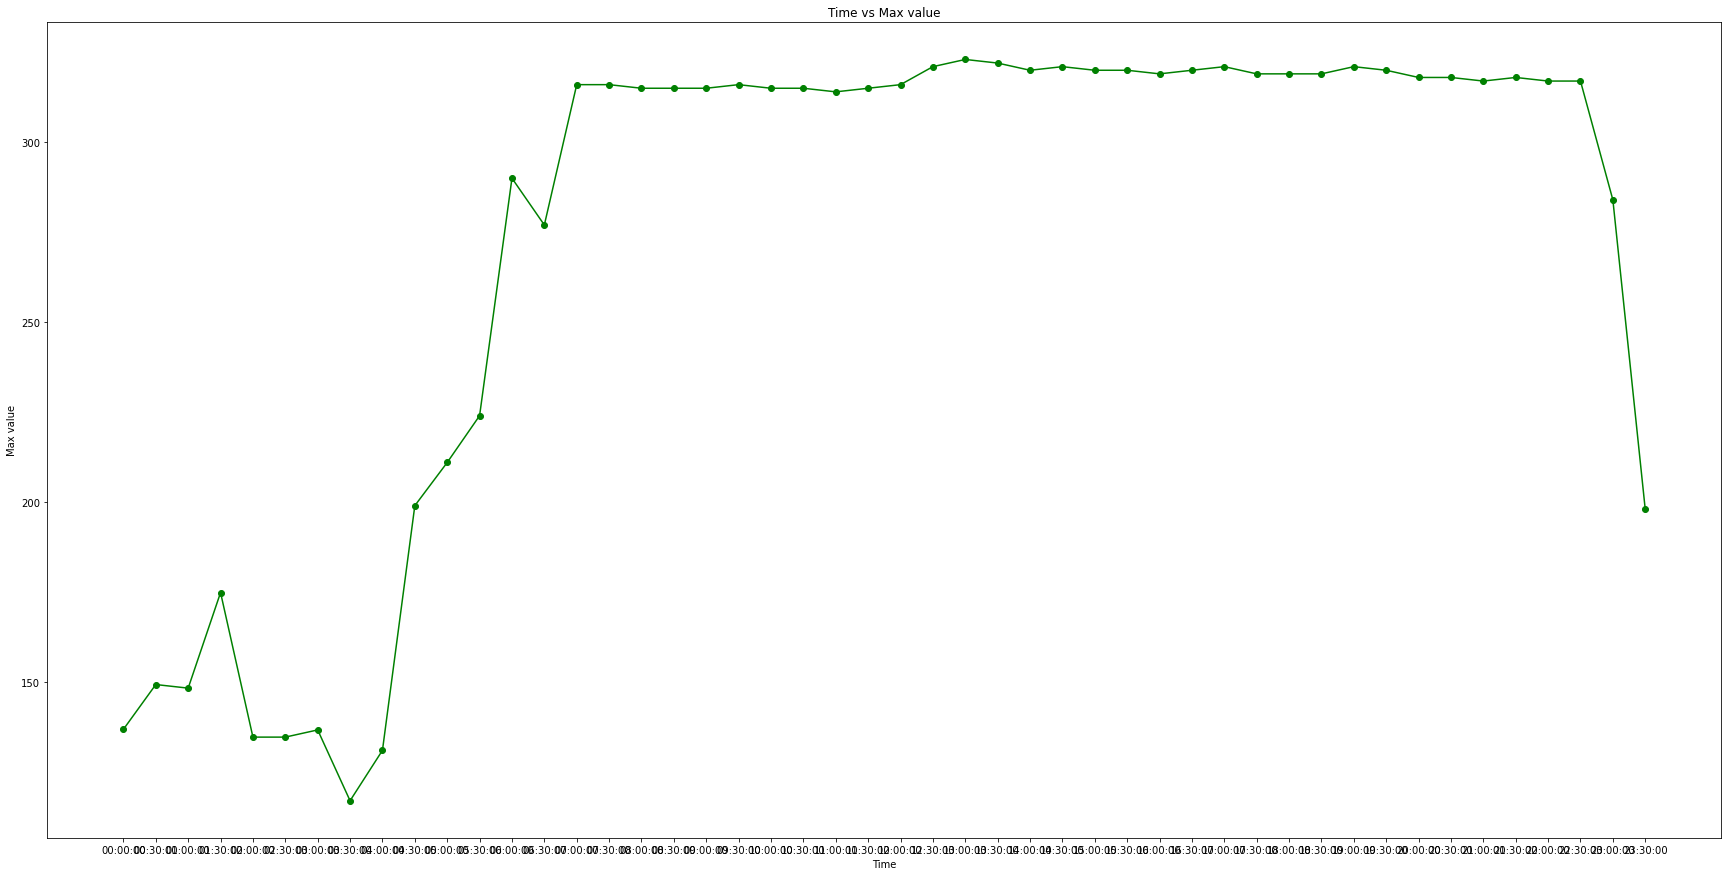

In [82]:
plt.figure(figsize=(30,15))
plt.plot(d10['Time'],d10['max'],color='green', marker='o')
plt.title('Time vs Max value')
plt.xlabel('Time')
plt.ylabel('Max value')
plt.show()

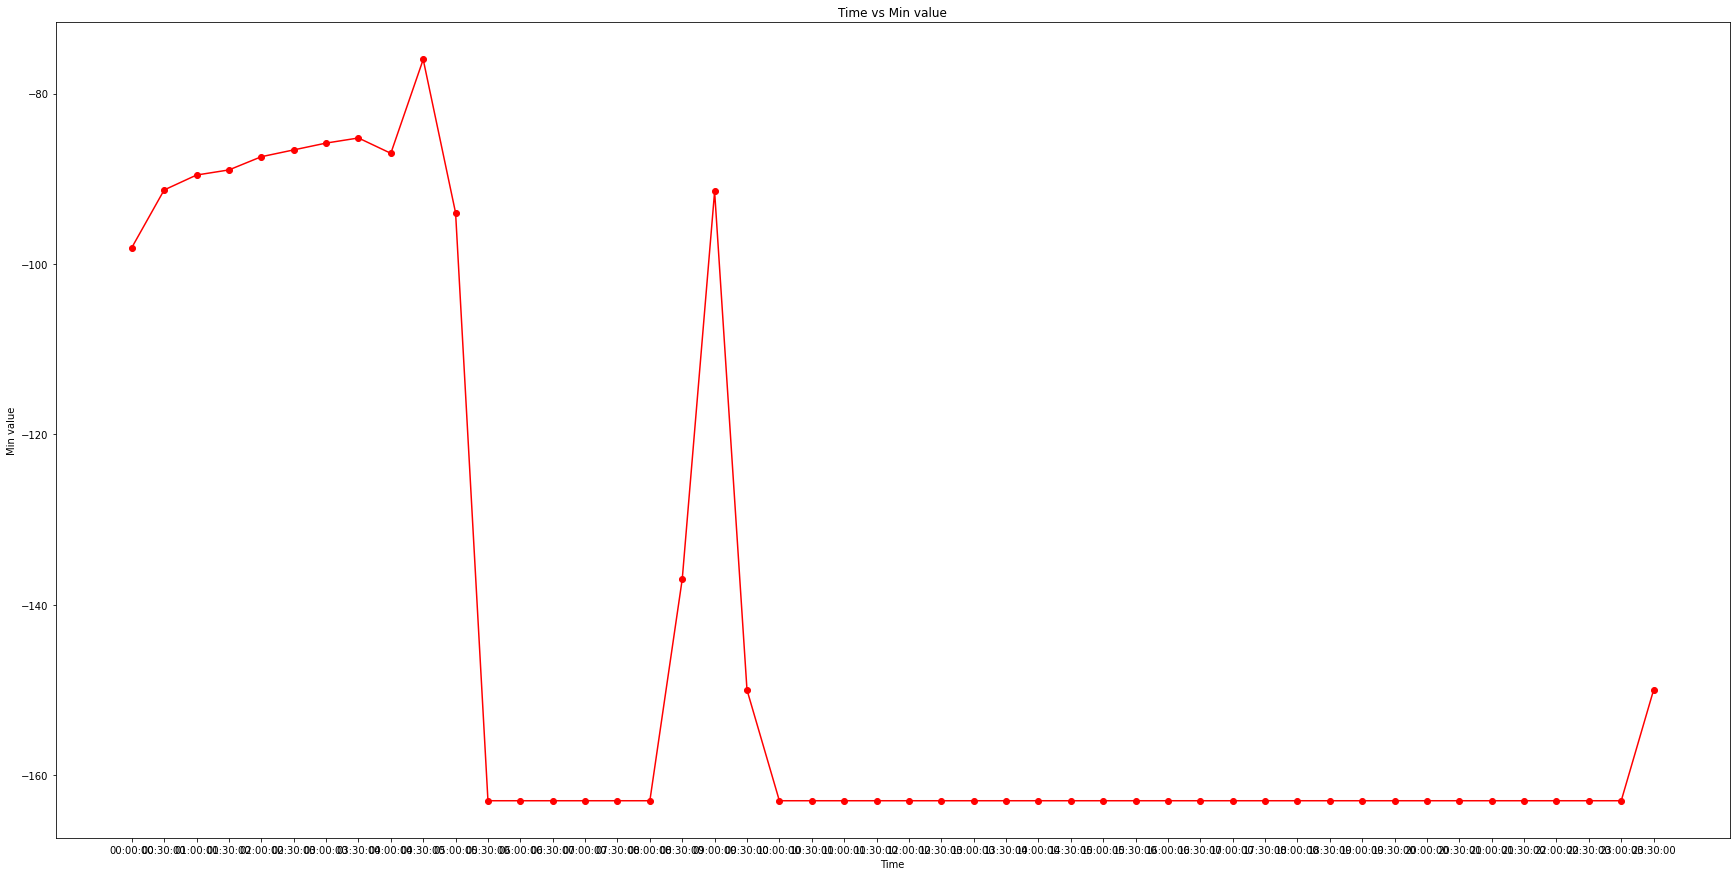

In [83]:
plt.figure(figsize=(30,15))
plt.plot(d10['Time'],d10['min'],color='red', marker='o')
plt.title('Time vs Min value')
plt.xlabel('Time')
plt.ylabel('Min value')
plt.show()

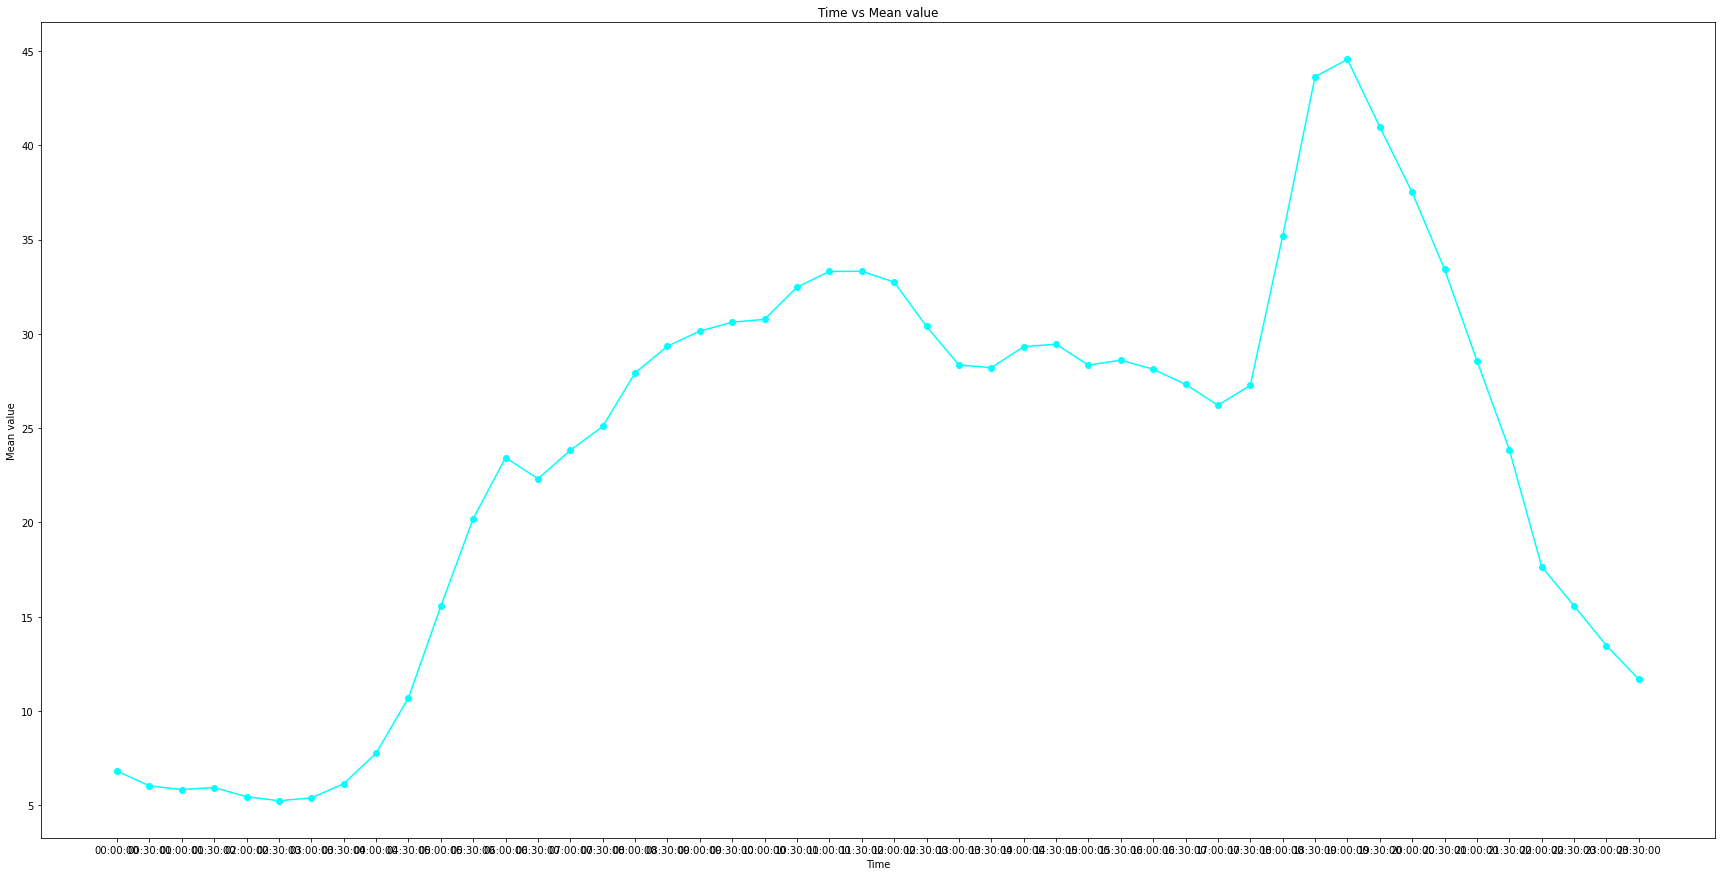

In [94]:
plt.figure(figsize=(30,15))
plt.plot(d10['Time'],d10['mean'],color='cyan', marker='o')
plt.title('Time vs Mean value')
plt.xlabel('Time')
plt.ylabel('Mean value')
plt.show()

In [84]:
d11=d7.reset_index() #reset the index for get Date as a column

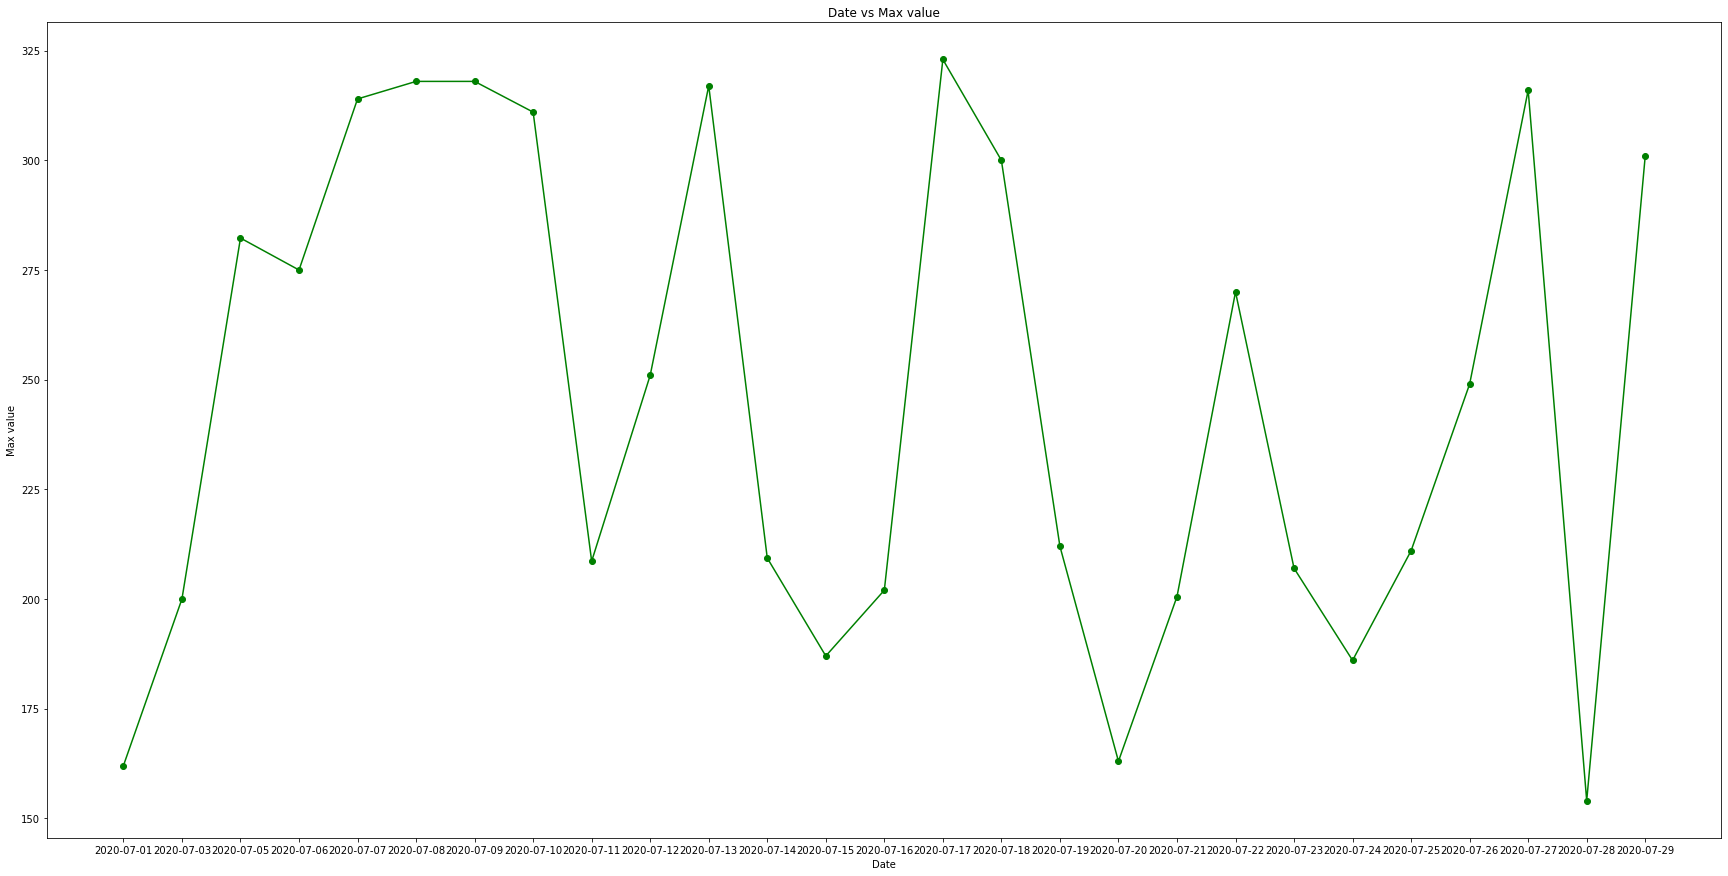

In [85]:
plt.figure(figsize=(30,15))
plt.plot(d11['Date'],d11['max'],color='green', marker='o')
plt.title('Date vs Max value')
plt.xlabel('Date')
plt.ylabel('Max value')
plt.show()

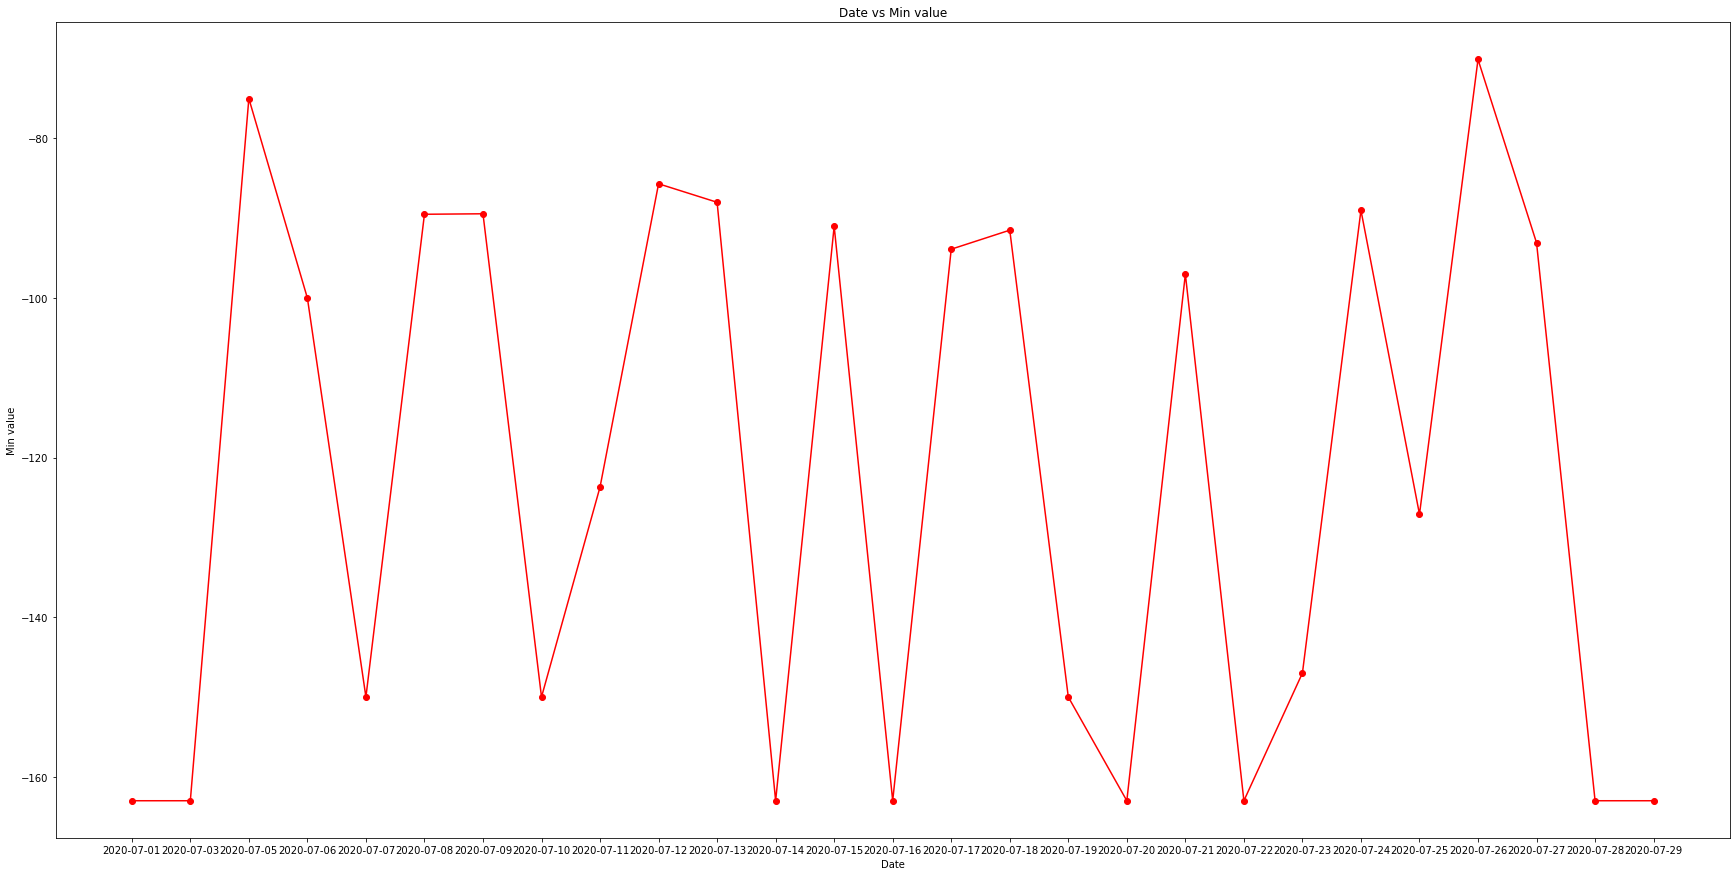

In [86]:
plt.figure(figsize=(30,15))
plt.plot(d11['Date'],d11['min'],color='red', marker='o')
plt.title('Date vs Min value')
plt.xlabel('Date')
plt.ylabel('Min value')
plt.show()

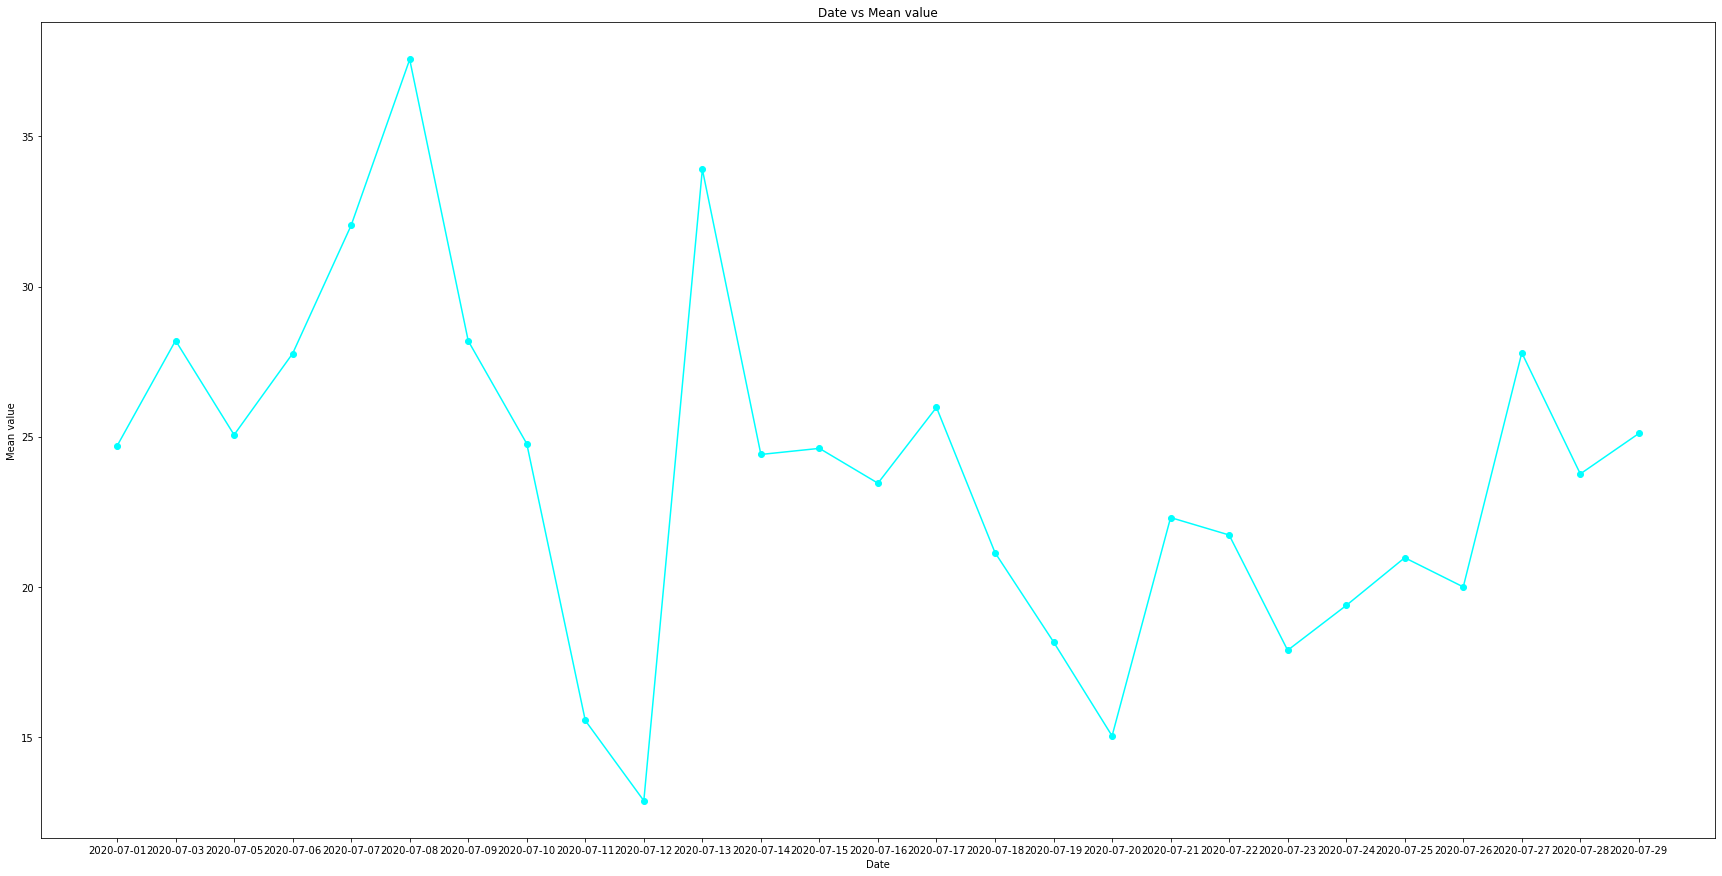

In [95]:
plt.figure(figsize=(30,15))
plt.plot(d11['Date'],d11['mean'],color='cyan', marker='o')
plt.title('Date vs Mean value')
plt.xlabel('Date')
plt.ylabel('Mean value')
plt.show()

In [91]:
d12=d3.reset_index() #reset the index for get Plant as a column

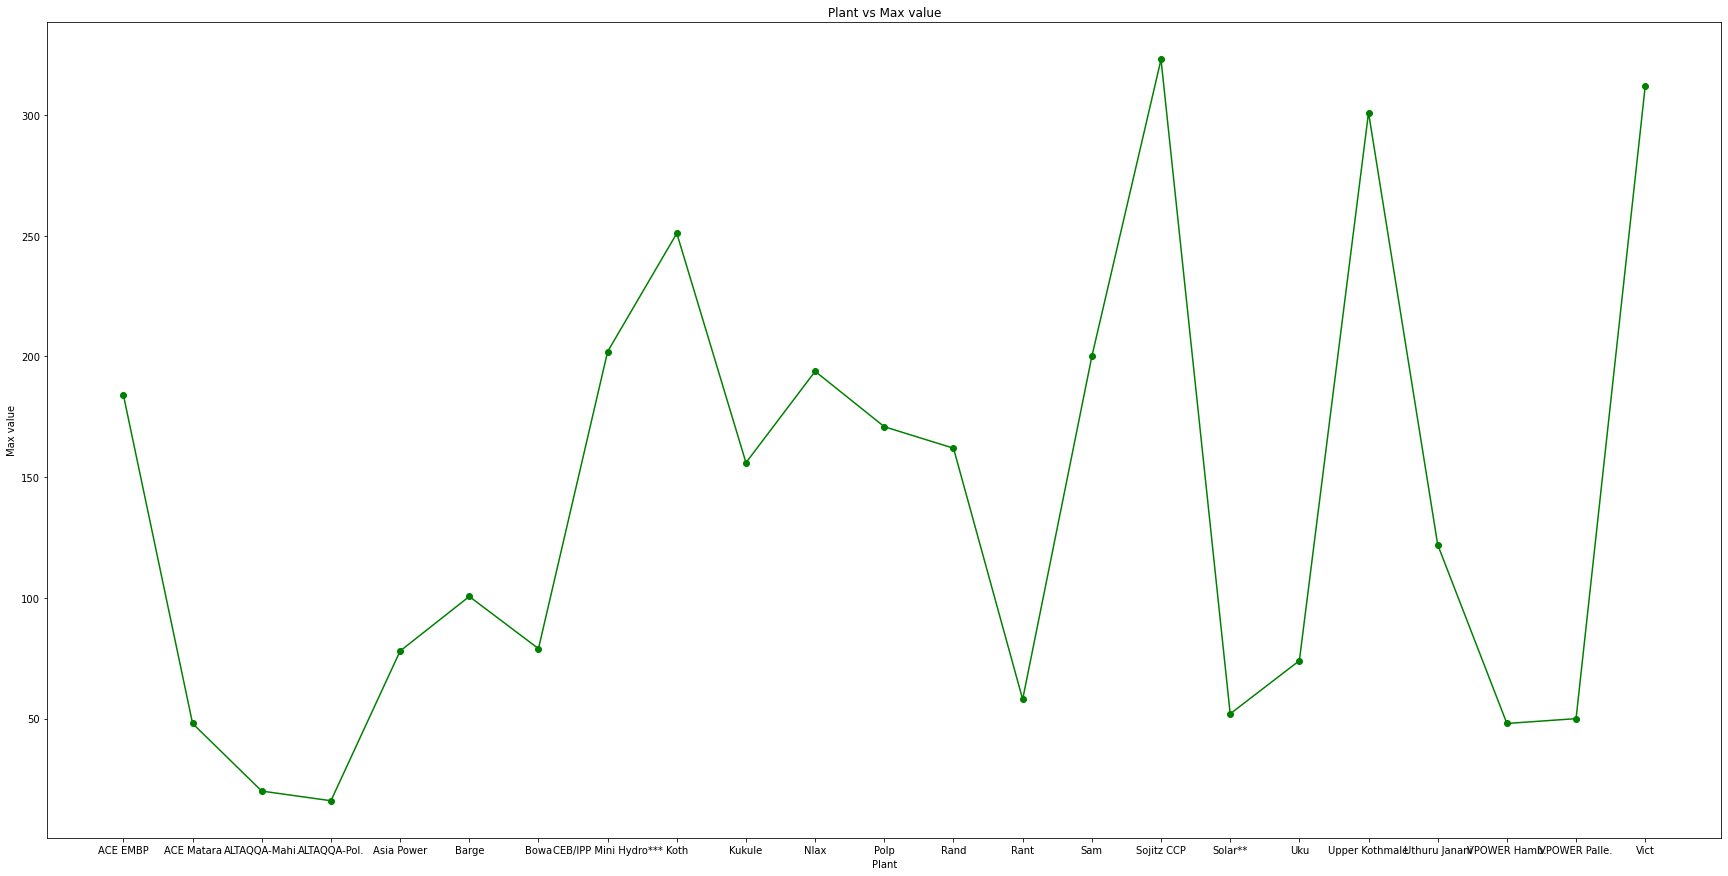

In [92]:
plt.figure(figsize=(30,15))
plt.plot(d12['Plant'],d12['max'],color='green', marker='o')
plt.title('Plant vs Max value')
plt.xlabel('Plant')
plt.ylabel('Max value')
plt.show()

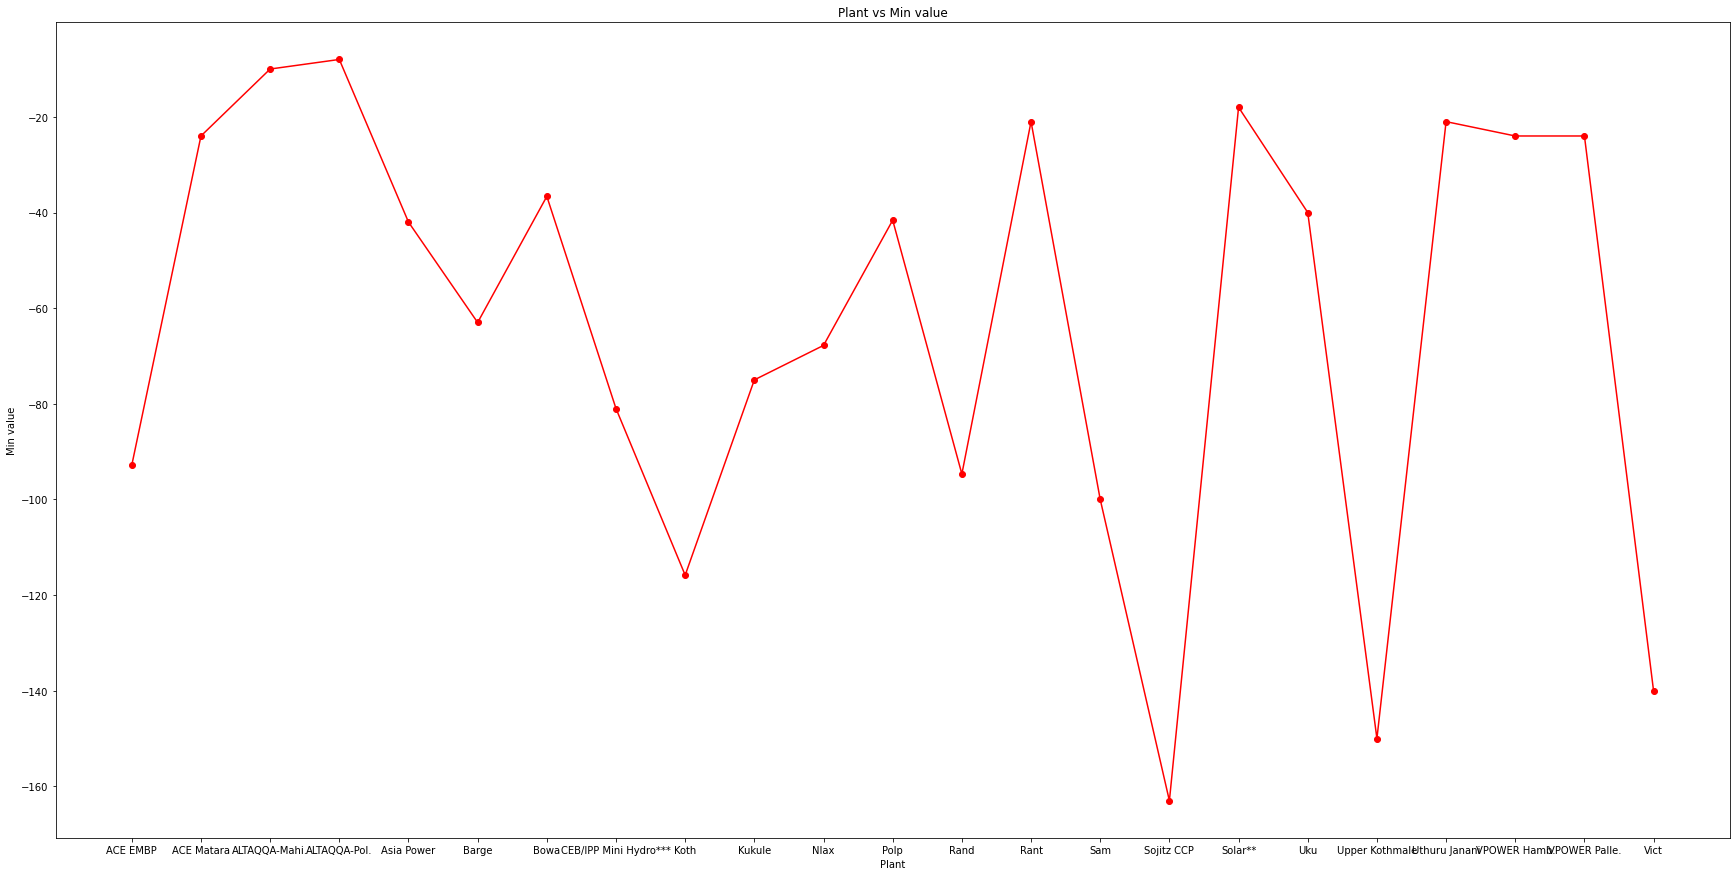

In [93]:
plt.figure(figsize=(30,15))
plt.plot(d12['Plant'],d12['min'],color='red', marker='o')
plt.title('Plant vs Min value')
plt.xlabel('Plant')
plt.ylabel('Min value')
plt.show()

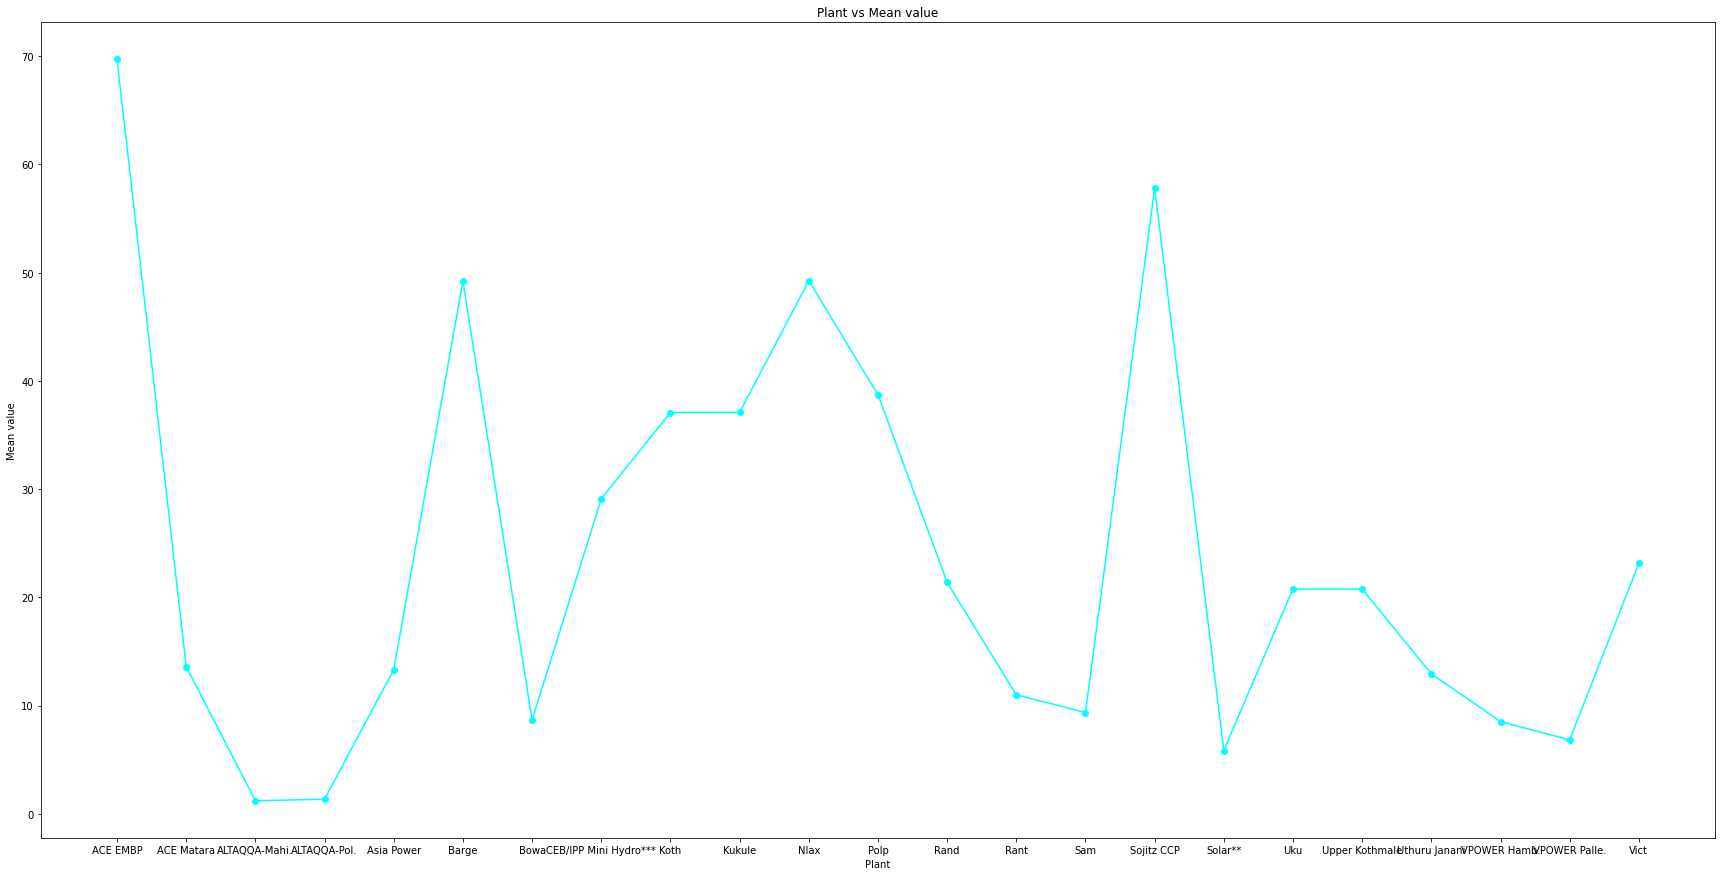

In [96]:
plt.figure(figsize=(30,15))
plt.plot(d12['Plant'],d12['mean'],color='cyan', marker='o')
plt.title('Plant vs Mean value')
plt.xlabel('Plant')
plt.ylabel('Mean value')
plt.show()